# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(a) = \arg\min_{y \in C} \|a-y\|^2,
\end{equation*}
где $C = \{y ~|~ \|y\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

One of my colleagues helped me to find the [scientific paper](http://jitkomut.eng.chula.ac.th/pdf/projlp.pdf) on this problem, and the basic algorithm was brought from there

$$
\begin{aligned}
L(y, \lambda) & =\|y-a\|_{2}^{2}+2 \lambda\left(\|y\|_{1}-1\right) \\
& =\sum_{k=1}^{n}\left(\left(y_{k}-a_{k}\right)^{2}+2 \lambda\left|y_{k}\right|\right)-2 \lambda .
\end{aligned}
$$

Lagrange dual function:

$$
g_{k}(\lambda)=\inf _{y_{k}}\left(y_{k}-a_{k}\right)^{2}+2 \lambda\left|y_{k}\right| .
$$

The solution $y_{k}^{*}$ that minimizes $g_{k}$:

$$
y_{k}^{*}= \begin{cases}a_{k}+\lambda, & a_{k} \leq-\lambda \\ 0, & \left|a_{k}\right|<\lambda \\ a_{k}-\lambda, & a_{k} \geq \lambda,\end{cases}
$$

and $g_{k}$ can be expressed as

$$
g_{k}(\lambda)= \begin{cases}-\left(\lambda-\left|a_{k}\right|\right)^{2}+a_{k}^{2}, & \lambda<\left|a_{k}\right| \\ a_{k}^{2}, & \lambda \geq\left|a_{k}\right| .\end{cases}
$$

The dual function is the minimum value of the Lagrangian over $y$:

$$
g(\lambda)=\inf _{y} L(y, \lambda)=\sum_{k} g_{k}(\lambda)-2 \lambda .
$$

The Lagrange dual problem:

$$
\begin{array}{ll}
\operatorname{maximize} & g(\lambda):=\sum_{k} g_{k}(\lambda)-2 \lambda \\
\text { subject to } & \lambda \geq 0,
\end{array}
$$

with variable $\lambda \in \mathbf{R}$. 

If $\|a\|_{1}>1$, then there exists a strictly feasible point $y$ such that $\|y\|_{1}<1 ⇒$ Slater's condition is held

To find an optimal solution $\lambda^{*}$, we set $g(\lambda) = 0$, and if the stationary point is positive, then it is the optimal solution. Otherwise, the optimal solution is 0:

$$
\lambda^{*}=\max \{0, \nu\}
$$

where $\nu$ is the root of $g^{\prime}(\nu)=0$.

To find the stationary point of $g(\lambda)$, note that

$$
g_{k}^{\prime}(\lambda)= \begin{cases}2\left(\left|a_{k}\right|-\lambda\right), & \lambda<\left|a_{k}\right| \\ 0, & \lambda \geq\left|a_{k}\right| .\end{cases}
$$

If $\|a\|_{1}>1$, the dual optimal point $\lambda^{*}$ is:

$$
g^{\prime}(\lambda)=\sum_{k=1}^{n} \max \left(\left|a_{k}\right|-\lambda, 0\right)-1 .
$$

Without loss of generality, we can sort $a_{k}$ in ascending order, i.e.,

$$
\left|a_{1}\right| \leq\left|a_{2}\right| \leq \ldots \leq\left|a_{n}\right| .
$$

Therefore, $g^{\prime}(\lambda)$ is a piecewise linear function in $\lambda$ where the slope changes at points $\left|a_{1}\right|,\left|a_{2}\right|, \ldots,\left|a_{n}\right|$. Initially at $\lambda=$ 0 , the slope of $g^{\prime}(\lambda)$ is $-2 n$ and increases by 2 when $\lambda=$ $\left|a_{1}\right|$. The slope keeps increasing as $\lambda$ reaches the points $\left|a_{k}\right|$ and eventually the slope is $-2$ when $\lambda \geq\left|a_{n}\right|$, as shown in Figure 3. This means we can simply make a plot of $g^{\prime}(\lambda)$
and checks for which interval $g^{\prime}(\lambda)$ changes its sign from a negative to a positive value. Once we can locate the interval, i.e., says between $\left|a_{i}\right|$ and $\left|a_{i+1}\right|$, we can do an interpolation to find $\lambda$ such that $g^{\prime}(\lambda)=0$, because for any interval $g^{\prime}(\lambda)$ is a linear function in $\lambda$.

When $\lambda=0, g^{\prime}(0)=2\|a\|_{1}-2$. Therefore, if $\|a\|<1$, the plot of $g^{\prime}(\lambda)$ is initially negative and never touches zero. This simply means $\lambda^{*}$ must be zero since the original vector is already inside the unit $\ell_{1}$-ball.

Using this scheme, we can develop a procedure to find $\lambda^{*}$ efficiently as follows.

If $\|a\|_{1} \leq 1$, then $\lambda^{*}=0$.

Otherwise, define $a_{0}=0$ and sort $\left|a_{k}\right|$ in ascending order. Compute the values of $g^{\prime}(\lambda)$ at points $\lambda=$ $\left|a_{0}\right|,\left|a_{1}\right|,\left|a_{2}\right|, \ldots,\left|a_{n}\right|$ as shown in the following table.

$$
\begin{array}{ll}
\lambda & g^{\prime}(\lambda) / 2 \\
\hline\left|a_{0}\right|=0 & \|a\|_{1}-1 \\
\left|a_{1}\right| & (1-n)\left|a_{1}\right|+\sum_{k=2}^{n}\left|a_{k}\right|-1 \\
\left|a_{2}\right| & (2-n)\left|a_{2}\right|+\sum_{k=3}^{n}\left|a_{k}\right|-1 \\
\vdots & \vdots \\
\left|a_{n-1}\right| & -\left|a_{n-1}\right|+\left|a_{n}\right|-1 \\
\left|a_{n}\right| & -1
\end{array}
$$

\setcounter{enumi}{2}

Locate the interval where $g^{\prime}(\lambda)$ changes its sign, i.e., Find $k$ such that $g^{\prime}\left(\left|a_{k}\right|\right) \geq 0$ and $g^{\prime}\left(\left|a_{k+1}\right|\right) \leq 0$, where $k$ can take values from 0 to $n-1$.

In this interval, the graph of $g^{\prime}(\lambda) / 2$ is a linear function described by

$g^{\prime}(\lambda) / 2=-(n-k) \lambda+\sum_{j=k+1}^{n}\left|a_{j}\right|-1, \quad\left|a_{k}\right| \leq \lambda \leq\left|a_{k+1}\right|$.

Hence, the point where $g^{\prime}(\lambda)=0$ is

$$
\lambda^{*}=\frac{\left(\sum_{j=k+1}^{n}\left|a_{j}\right|\right)-1}{(n-k)} .
$$

Короче какое-то гачи, если есть может попроще понимание, то сообщите, пожалуйста, а то я просто успел пропроцессить эту статью и перекопипастить ее 🙃

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

$\text{prox}_{\lambda \mathbb{I}_C} (x) := \text{argmin}_z (\frac12 \|z - x \|^2 + λ\mathbb{I}_C) =\text{argmin}_z (\frac12 \|z - x \|^2) +  \text{argmin}_z (λ\mathbb{I}_C)  =\text{argmin}_z (\frac12 \|z - x \|^2) = \text{prox}_{\lambda \mathbb{I}_C} (x)$ 

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейной модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} (Xw - y)^T (Xw - y)
\end{equation}

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [2]:
dataset = "mushrooms.txt" 

In [4]:
from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape

Разделите (лучше случайно) данные (а значит $X$ и $y$) на две части: обучающую и тестовую (примерно в отношении $4$ к $1$). Опишите, как это было сделано.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=True)

It was made by using the function from sklearn

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

Let's recall how to calculate the constants:

a) $\|∇f(w_1) - ∇f(w_2)\| ≤ L \|w_1 - w_2\|$

$∇_w f = \frac1n ∇_w \|Xw - y\|^2 = \frac1n X^T(Xw - y)$

$\|∇f(w_1) - ∇f(w_2)\| = \frac1n \|X^TX(w_1 - w_2)\| ≤ \frac1n \|X^TX\| \|w_1 - w_2\| ⇒ \boxed{ L = \frac1n \|X^TX\| }$

In [7]:
L = 1/n * np.linalg.norm(X_train.T @ X_train)
print("L =", L)

L = 8.05315397225162


$∇^2f(w) ≥ μI ⇒ μ = \min_i(λ_i(∇^2f(w))) = \min_i(λ_i(\frac1n X^TX))$

In [8]:
mu = min(np.linalg.eigvals(1/n * X_train.T @ X_train))
print("mu =", mu)

mu = (-2.3760458592603636e-15+0j)


__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [10]:
def f(X, y, w, n):
    return 1/n * np.linalg.norm(X @ w - y)**2

def Grad_Descent(n_iter, X, lr, y, w_0, n):
    points = []
    w_old = w_0
    for i in range(n_iter):
        grad = Get_grad (X, y, w_old, n)
        
        w_new = w_old - lr*grad
        w_old = w_new 
        points.append(w_old)
    return points

def Get_grad (X, y, w, n): 
    return 1/n * X.T @ (X @ w - y)

def Draw_Graph (n_iter, X, lr, y, w_0, n, w_true, criteria, logscale=False): 
    points = Grad_Descent(n_iter, X, lr, y, w_0, n)
    diff_arr, crit_arr, x = [], [], []

    for i in range(n_iter):
        x.append(i + 1)
        diff_arr.append(points[i] - w_true)
        if criteria == "x_criteria":
            crit_arr.append(np.linalg.norm(diff_arr[i]))
        elif criteria == "f_criteria":
            crit_arr.append(np.abs(f(X, y, points[i], n) - f(X, y, w_true, n)))

    y = crit_arr
    if criteria == "x_criteria":
        plt.plot(x, y, label = "||w^k - w*||")
    elif criteria == "f_criteria":
        plt.plot(x, y, label = "|f(w^k) - f(w*)|")

    plt.xlabel('n_iter')
    plt.ylabel('criteria')
    if logscale == True:
        plt.yscale("log")
    plt.title('Standard axis convergence')
    plt.legend()
    plt.show()

The first problem that I've encountered is that 
```
w_true = np.linalg.solve(X_train, y_train)
```
doesn't work, assumably because the matrix X_train is singular (there are zeroed rows)

So we need to find the $w_{true}$ like in HW_1


In [11]:
mu_approx = 0.0045
w_0 = np.random.sample(d)
A_train_approx = X_train.T @ X_train + mu_approx*np.ones(d)
lambda_min = min(np.linalg.eigvalsh(A_train_approx))  
w_true_approx = np.linalg.solve(A_train_approx, X_train.T @ y_train)    

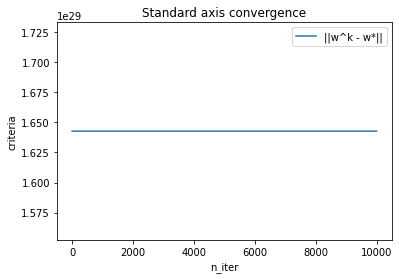

In [12]:
Draw_Graph(10**4, X_train, 1/L, y_train, np.ones(d), np.shape(X_train)[0], w_true_approx, criteria = "x_criteria")

IDK why this doesn't work, now I'll try to find the $w_{true}$ by GD with a lot of iters

In [13]:
w_true = Grad_Descent(10**4, X_train, 1/L, y_train, np.ones(d), np.shape(X_train)[0])[-1]
print(np.linalg.norm(w_true - w_true_approx))

1.642709224347448e+29


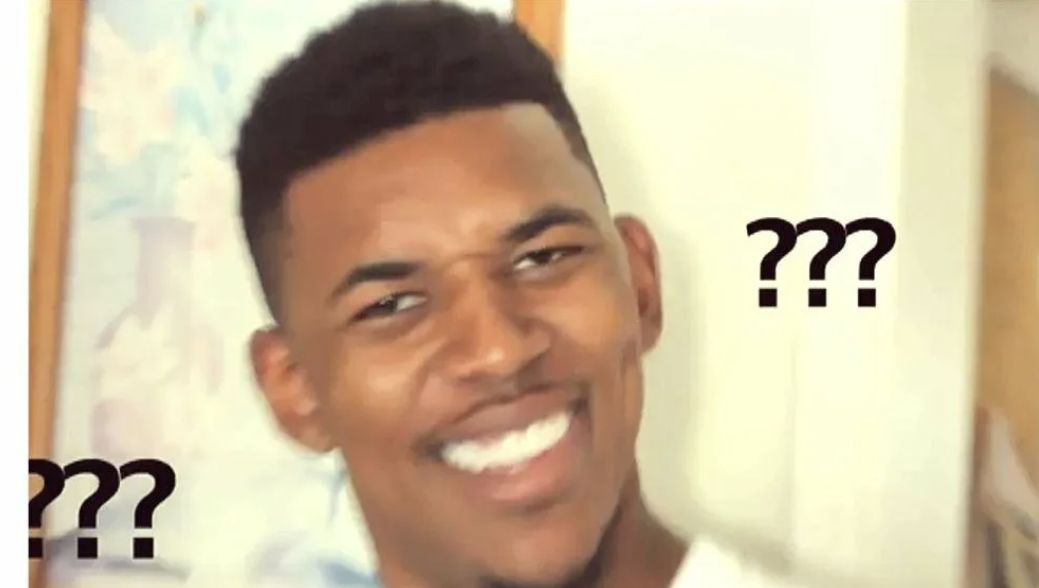

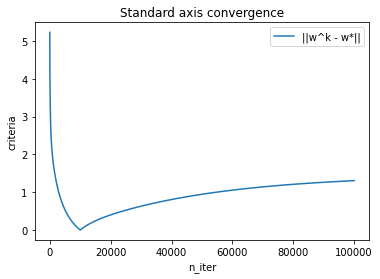

In [14]:
Draw_Graph(10**5, X_train, 1/L, y_train, np.ones(d), np.shape(X_train)[0], w_true, criteria = "x_criteria")

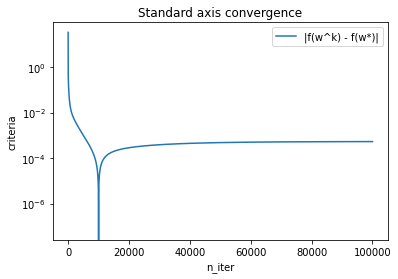

In [15]:
Draw_Graph(10**5, X_train, 1/L, y_train, np.ones(d), np.shape(X_train)[0], w_true, criteria = "f_criteria", logscale = True)

Firstly, the comment about singularity

Secondly, the strange convergence of the gradient descent: the x_criteria is okay (though it strangely diverges afterwards), and the f_criteria hits the optimum momentarily (strange!)

Thirdly, many iterations to proceed

__(д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

In [16]:
y_pred = X_test @ w_true
for i in range(len(y_pred)):
    y_pred[i] = round(y_pred[i])
acc = accuracy_score(y_test, y_pred)
print("Accuracy = ", acc)

Accuracy =  0.9960610536681438


In [ ]:
def Projection(vec, lambda_):
    if (np.linalg.norm(vec, 1) <= lambda_):
        return vec
    else: 
        return vec #something else here to continue (according to the article)

In [ ]:
#ответ
def Grad_Descent_l1_ball (n_iter, X, lr, y, w_0, n, lambda_):
    points = []
    w_old = w_0
    for i in range(n_iter):
        grad = Get_grad (X, y, w_old, n)
        
        w_new = Projection(w_old - lr*grad, lambda_) #here I added this line, to stay inside
        w_old = w_new 
        points.append(w_old)
    return points


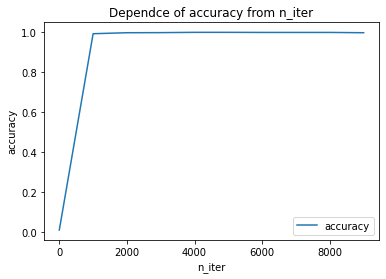

In [ ]:
def acc_n_iter_dependency (start, finish, step, GD_type, lambda_ = None):
    acc_arr, n_arr = [], []
    for n_iter in range(start, finish, step):
        if GD_type == "basic":
            w_true = Grad_Descent(n_iter, X_train, 1/L, y_train, np.ones(d), np.shape(X_train)[0])[-1]
        elif GD_type == "l1_ball":
            w_true = Grad_Descent_l1_ball (n_iter, X_train, 1/L, y_train, np.ones(d), np.shape(X_train)[0], lambda_)[-1]
            
        y_pred = X_test @ w_true
        for i in range(len(y_pred)):
            y_pred[i] = round(y_pred[i])
        acc_arr.append(accuracy_score(y_test, y_pred))
        n_arr.append(n_iter)

    plt.plot(n_arr, acc_arr, label = "accuracy")
    plt.xlabel('n_iter')
    plt.ylabel('accuracy')
    plt.title('Dependce of accuracy from n_iter')
    plt.legend()
    plt.show()

acc_n_iter_dependency (1, 10**4, 1000, "basic")

__(e)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $\lambda$. Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

\begin{equation}
\min_{w \in \mathbb{C}} \frac{1}{n} (Xw - y)^T (Xw - y)
\end{equation}

$C = \{w ~|~ \|w\|_1 \leq λ \}$

Moved it before in order to add to the initial function

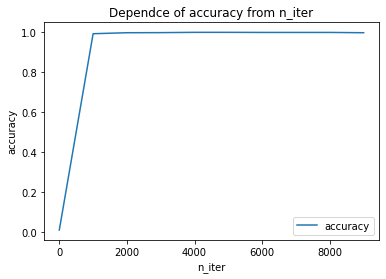

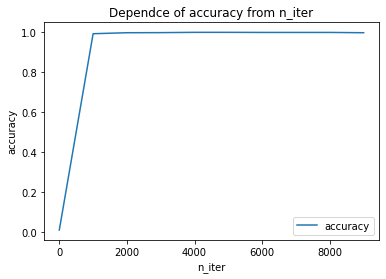

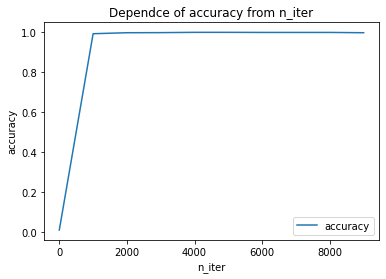

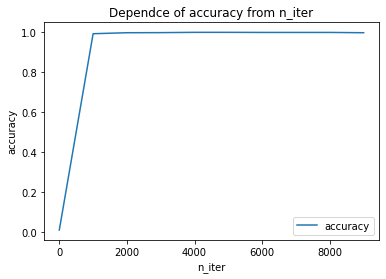

In [ ]:
#here should be something for cross-validating between lambda and n_iter and other stuff, so I just made a regular cycle

for lambda_ in [1, 10, 100, 1000]:
    acc_n_iter_dependency (1, 10**4, 1000, "l1_ball", lambda_)

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

In [ ]:
#ответ

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

In [ ]:
#ответ

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.